# **Stock Price Forecasting Using Time-Series Analysis**

*By David Fit*

---


## Table of Contents

1. [Introduction](#1-introduction)

2. [EDA (Exploratory Data Analysis)](#2-eda-exploratory-data-analysis)

3. [Stationarity Testing](#3-stationarity-testing)

4. [Decomposition](#4-decomposition)

5. [Rolling Statistics](#5-rolling-statistics)

6. [ARIMA Model](#6-arima-model)

7. [Forecasting](#7-forecasting)

8. [Conclusions](#8-conclusions)


# **1. Introduction**

This project focuses on **forecasting stock prices** using **time-series analysis techniques.** By analyzing historical data from two specific stocks, the objective is to uncover patterns and trends that inform future price movements.

The primary application in this project is the **Autoregressive Integrated Moving Average (ARIMA)** model, a widely recognized time-series forecasting method.

 The objective is to assess the **robustness of ARIMA** in forecasting **diverse stock price patterns** and to highlight areas where more advanced methods may be needed to enhance accuracy.




## What is ARIMA ?

The ARIMA (AutoRegressive Integrated Moving Average) model is a forecasting method used for time series data, like stock prices, by combining three key components: **AutoRegressive (AR)**, **Integrated (I)**, and **Moving Average (MA)**.

- The "AR" component uses past values of the series to predict future values.

- The "I" component makes the data stationary by differencing (removing trends).

- The "MA" component adjusts predictions based on past forecast errors.

In simpler terms, ARIMA looks at **past stock prices** to predict **future prices** while accounting for **trends and fluctuations.** To use ARIMA, the data is made stationary (if not already), and then the model is fitted by adjusting parameters (p, d, q) to best capture the relationships in the data:

- **p** = AutoRegressive order: the number of lagged observations (past values) included in the model.

- **d** = Differencing order: the number of times the data needs to be differenced to make the time series stationary.

- **q** = Moving Average order: the size of the moving average for smoothing error terms.

We will be needing the **pmdarima** package from the available Python libraries, which  will allow us to build our ARIMA models (shown below):

In [ ]:
pip install pmdarima

In [ ]:
# IMPORT LIBRARIES
# General Libraries
import os
import warnings
import math
from joblib import Parallel, delayed

# Data Manipulation and Analysis Libraries
import numpy as np
import pandas as pd

# Plotting and Visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import rcParams

# Time Series and Statistical Analysis
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from statsmodels.stats.diagnostic import normal_ad
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Statistical Testing
from scipy.stats import shapiro, kstest, anderson

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# **2. EDA (Exploratory Data Analysis)**
I will be analysing the **S&P500** and the **Arch Capital Group LTD** stocks.

1. The **S&P500 Index** represents a broad segment of the U.S. equity market and serves as a valuable benchmark for tracking global market performance and trends.

2. **Arch Capital Group Ltd.** is a global provider of insurance, reinsurance, and mortgage insurance, making it a suitable candidate for examining sector-specific stock movements.

The two stocks will be analysed, plotted and evaluated **simultaneosuly** through Python functions. Clear labelling is provided. The two stocks will be examined in parallel, making comparisons easier and more insightful.

We begin by reading the two csv files into a pandas dataframe and set the **"Date"** column as the **index** of both dataframes, enabling efficient time-series analysis. To ensure consistency, we convert the dates to **business days**. This step filters out weekends and holidays, which do not have corresponding stock price data.

In [ ]:
# LOAD CSV FILE DATA FOR S&P5000
sp500_data = pd.read_csv(
    "S&P500.csv.csv",
    sep=','
)

sp500_data['Date'] = pd.to_datetime(sp500_data['Date'], format='%Y-%m-%d')
sp500_data.set_index('Date', inplace=True)

sp500_data = sp500_data.asfreq('B', method='pad')
print(sp500_data.head())

                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
1999-11-18  27.896016  30.654965  24.523970  26.976368  62546380        0.0   
1999-11-19  26.324950  26.363270  24.409017  24.753885  15234146        0.0   
1999-11-22  25.328663  26.976368  24.562289  26.976368   6577870        0.0   
1999-11-23  26.056724  26.746461  24.523975  24.523975   5975611        0.0   
1999-11-24  24.600619  25.711862  24.523981  25.175400   4843231        0.0   

            Stock Splits  
Date                      
1999-11-18           0.0  
1999-11-19           0.0  
1999-11-22           0.0  
1999-11-23           0.0  
1999-11-24           0.0  


In [ ]:
# LOAD CSV FILE DATA FOR ARCH CAPITAL GROUP LTD (ACGL)
acgl_data = pd.read_csv(
    "MacroTrends_Data_Download_ACGL.csv",
    sep=','
)

acgl_data['date'] = pd.to_datetime(acgl_data['date'], format='%d/%m/%Y')
acgl_data.set_index('date', inplace=True)

acgl_data = acgl_data.asfreq('B', method='pad')
print(acgl_data.head())

              open    high     low   close    volume
date                                                
1995-09-14  2.1661  2.2718  2.1661  2.2453  12915900
1995-09-15  2.2189  2.2718  2.1925  2.2453   3802500
1995-09-18  2.2189  2.2982  2.2189  2.2453   1345500
1995-09-19  2.2189  2.2982  2.2189  2.2189   1305000
1995-09-20  2.2189  2.2982  2.2189  2.2453    648900


We only need the **Closing Price** for our analysis from each stock. The closing price reflects the **final price** at which a stock is traded during a regular trading session.

Below we plot the closing prices of S&P500 and Arch Capital Group Ltd (ACGL).

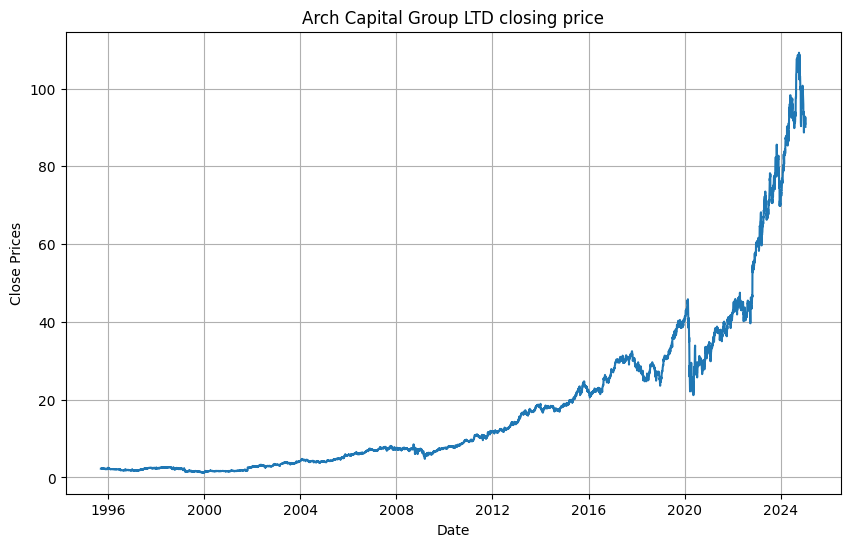

None


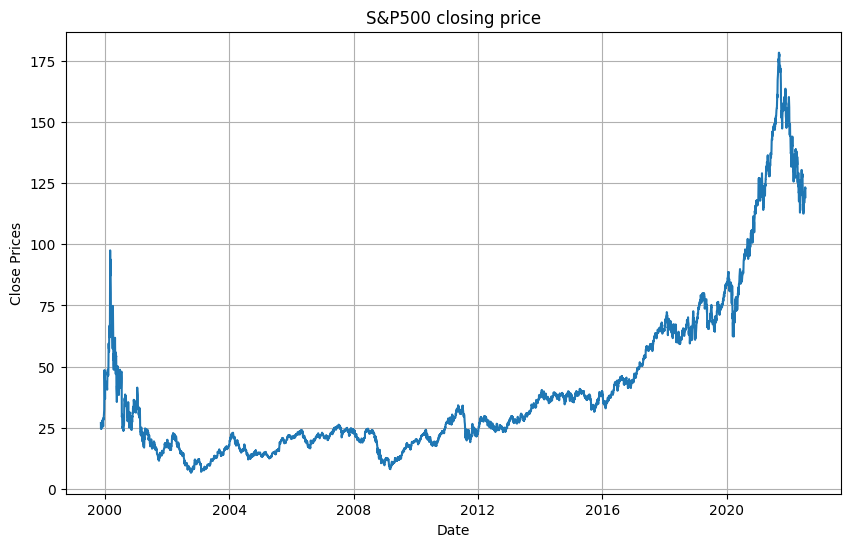

None


In [ ]:
def plot_closing_price(close_data, company_name):
    plt.figure(figsize=(10, 6))
    plt.grid(True)
    plt.xlabel('Date')
    plt.ylabel('Close Prices')
    plt.plot(close_data)
    plt.title(f'{company_name} closing price')
    plt.show()

# Plot prices
print(plot_closing_price(acgl_data['close'], 'Arch Capital Group LTD'))
print(plot_closing_price(sp500_data['Close'], 'S&P500'))


## Insights

The ACGL stock is recorded through 30 years, from 1995 to 2025, while the S&P500 dataset spans approximatey 22 years, from 2000 to 2022.

The ACGL Company was founded in 2000, which explains the slow start in stock prices. It has since gradually increased in value until 2020, which experienced an abrupt downward spike, most likely due to the COVID-19 pandemic. It has since recovered exponentially to a stock price of 100.

On the other hand, the S&P500 already existed as a major indicator before the year 2000, which experienced a rather high closing price of 100. Around the early 2000's, the index experienced massive volatility. The Bubble Burst in 2000, causing the S&P500 to experience a significant downturn from its high point in 2000 to much lower levels by 2002. In 2008, the global financial crisis hit, resulting in another sharp drop in the S&P500 index. Since then, the index has exponentially recovered, its only sharp decline having occured during the pandemic in 2020. From 2020 to 2022, the S&P500 saw massive growth, reaching an all-time high of 175 in its closing price.

In [ ]:
# We only need the Closing Prices column from both dataframes for our next analysis
acgl_close = acgl_data['close']
sp500_close = sp500_data['Close']

The data we'll be using:
- **acgl_close** = dataframe of the ACGL closing prices and their corresponding dates.
- **sp500_close** = dataframe of the S&P500 closing prices and their corresponding dates.

Our data needs to be **stationary** (constant mean, variance and autocorrelation), due to its stable statistical properties which enable reliable and efficient model estimation.

Stationary data does not have trends (upward or downward) or changing/fluctuating volatility.

# **3. Stationarity Testing**

The function below, **adf_test_results()** is testing for stationarity using the **Augmented Dickey-Fuller (ADF)** test, a statistical test designed to check if a time series is stationary or not.

1. A more negative value of the **test statistic** suggests the data is more likely to be **stationary**.

2. A **p-value less than 0.05** indicates the null hypothesis (that the data is non-stationary) can be rejected, meaning the **data is stationary**.

3. A **p-value greater than 0.05** means we fail to reject the null hypothesis, indicating the **data is non-stationary**.

4. If the **test statistic is more negative than the critical value** at a given confidence level, the null hypothesis can be rejected, indicating **stationarity**.

In [ ]:
def adf_test_results(series):
    # Perform ADF test
    result = adfuller(series)
    print('ADF Test Statistic:', result[0])
    print('p-value:', result[1])
    print('Number of Lags Used:', result[2])
    print('Number of Observations Used:', result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

    # Interpretation
    if result[1] <= 0.05:
        print("The data is stationary (reject the null hypothesis).")
    else:
        print("The data is non-stationary (fail to reject the null hypothesis).")

adf_test_results(acgl_close)

# If p-value ≤ 0.05, the null hypothesis is rejected: data = stationary.
# If p-value > 0.05, the null hypothesis is not rejected, data = non-stationary.

ADF Test Statistic: 2.5322332501423928
p-value: 0.9990595128093702
Number of Lags Used: 36
Number of Observations Used: 7615
Critical Values:
   1%: -3.4312090289827135
   5%: -2.8619196266183016
   10%: -2.5669720707652286
The data is non-stationary (fail to reject the null hypothesis).


In [ ]:
adf_test_results(sp500_close)

ADF Test Statistic: 0.2976300783519961
p-value: 0.977235494190777
Number of Lags Used: 31
Number of Observations Used: 5877
Critical Values:
   1%: -3.4314631799419697
   5%: -2.8620319213195273
   10%: -2.5670318475352984
The data is non-stationary (fail to reject the null hypothesis).


Both dataframes are **not stationary**, therefore we must difference them, by applying the first difference:

- diff() = **First Difference:** subtracting each value from its previous one.

- dropna() = **Removes the first NaN value** generated from the differencing, as the first data point does not have a previous point to subtract from.

In [ ]:
acgl_diff = acgl_close.diff().dropna()
sp500_diff = sp500_close.diff().dropna()

print(acgl_diff, sp500_diff)

date
1995-09-15    0.0000
1995-09-18    0.0000
1995-09-19   -0.0264
1995-09-20    0.0264
1995-09-21    0.0265
               ...  
2025-01-06   -0.6600
2025-01-07    1.5100
2025-01-08    0.4100
2025-01-09    0.0000
2025-01-10   -2.4900
Freq: B, Name: close, Length: 7651, dtype: float64 Date
1999-11-19   -2.222483
1999-11-22    2.222483
1999-11-23   -2.452393
1999-11-24    0.651424
1999-11-25    0.000000
                ...   
2022-07-06    0.620003
2022-07-07    1.970001
2022-07-08   -0.639999
2022-07-11    0.610001
2022-07-12   -3.880005
Freq: B, Name: Close, Length: 5908, dtype: float64


We now have two modified dataframes:

- **acgl_diff** = differenced version of acgl_close.
- **sp500_diff** = differenced version of sp500_close.

We will be using these dataframes to train our ARIMA model.

Below we check to see that our new dataframes have no Nan or Inifinity values.

In [ ]:
print(acgl_diff.isna().sum(), np.isinf(acgl_diff).sum())
print(sp500_diff.isna().sum(), np.isinf(sp500_diff).sum())

0 0
0 0


In [ ]:
# Test for stationarity again
adf_test_results(acgl_diff)

ADF Test Statistic: -15.346246133700612
p-value: 3.772623992524619e-28
Number of Lags Used: 35
Number of Observations Used: 7615
Critical Values:
   1%: -3.4312090289827135
   5%: -2.8619196266183016
   10%: -2.5669720707652286
The data is stationary (reject the null hypothesis).


In [ ]:
adf_test_results(sp500_diff)

ADF Test Statistic: -15.43898700797306
p-value: 2.8817590258385635e-28
Number of Lags Used: 30
Number of Observations Used: 5877
Critical Values:
   1%: -3.4314631799419697
   5%: -2.8620319213195273
   10%: -2.5670318475352984
The data is stationary (reject the null hypothesis).


We now have two stationary dataframes, after only one differencing step.
- Note we may be able to use **d=1** (differencing order) in our ARIMA parameter selection. However we must experiment to find the best possible combination of parameters for the model.

Let's visualize the effect of first-order differencing on the stock price series below:

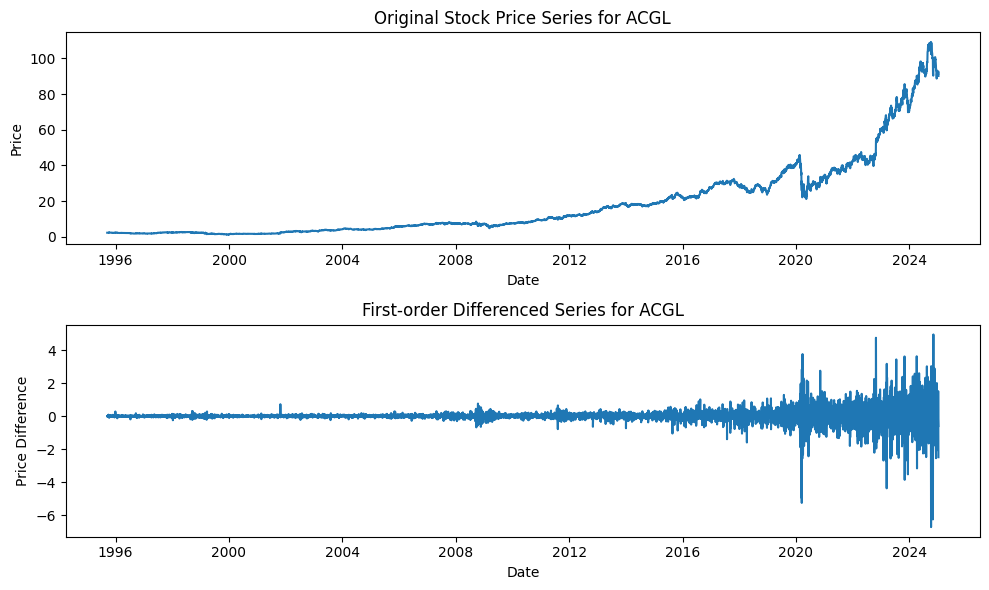

In [ ]:
def plot_first_order_diff(df_close, df_diff, title=""):
    # Plot the original series
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(df_close)
    plt.title(f'Original Stock Price Series for {title}')
    plt.xlabel('Date')
    plt.ylabel('Price')

    # Plot the differenced series
    plt.subplot(2, 1, 2)
    plt.plot(df_diff)
    plt.title(f'First-order Differenced Series for {title}')
    plt.xlabel('Date')
    plt.ylabel('Price Difference')
    plt.tight_layout()
    plt.show()

plot_first_order_diff(acgl_close, acgl_diff, title="ACGL")

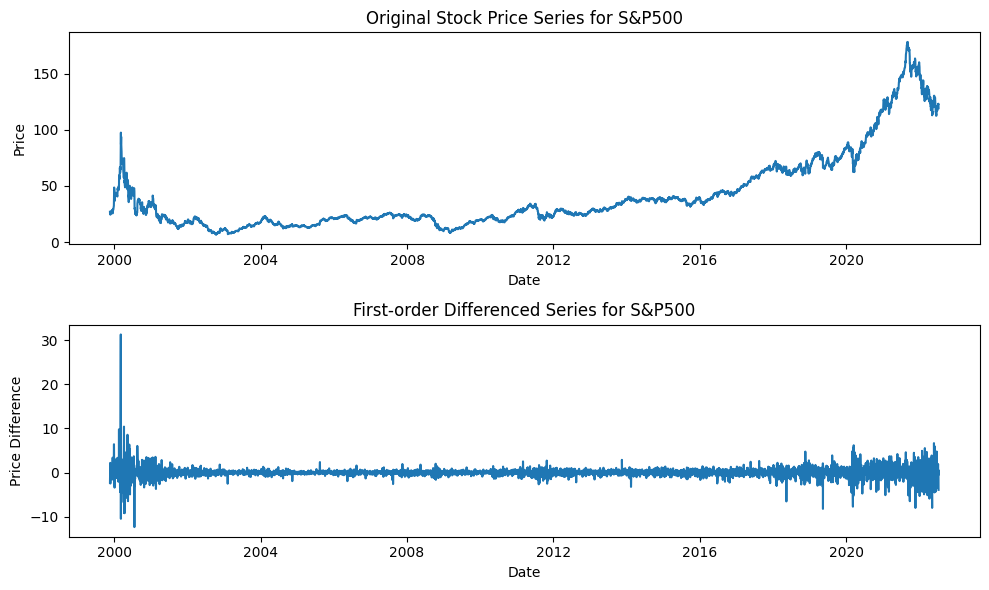

In [ ]:
plot_first_order_diff(sp500_close, sp500_diff, title="S&P500")

# **4. Decomposition**

Why do we decompose our time-series data?
- We uncover each layer, helping us understand its underlying structure .
- Anomaly Detection: Highlights deviations from expected patterns.

We split the two differenced series into four parts:
1. **Original:** This represents the raw data before decomposition, showing all components combined.

2. **Trend:** The long-term direction or movement in the data, indicating whether it is generally increasing, decreasing, or stable.

3. **Seasonal:** The repeating patterns or cycles that occur at regular intervals, such as daily, weekly, or yearly fluctuations.

4. **Residual:** The irregular component or noise left after removing the trend and seasonal patterns, capturing the unexplained variability.

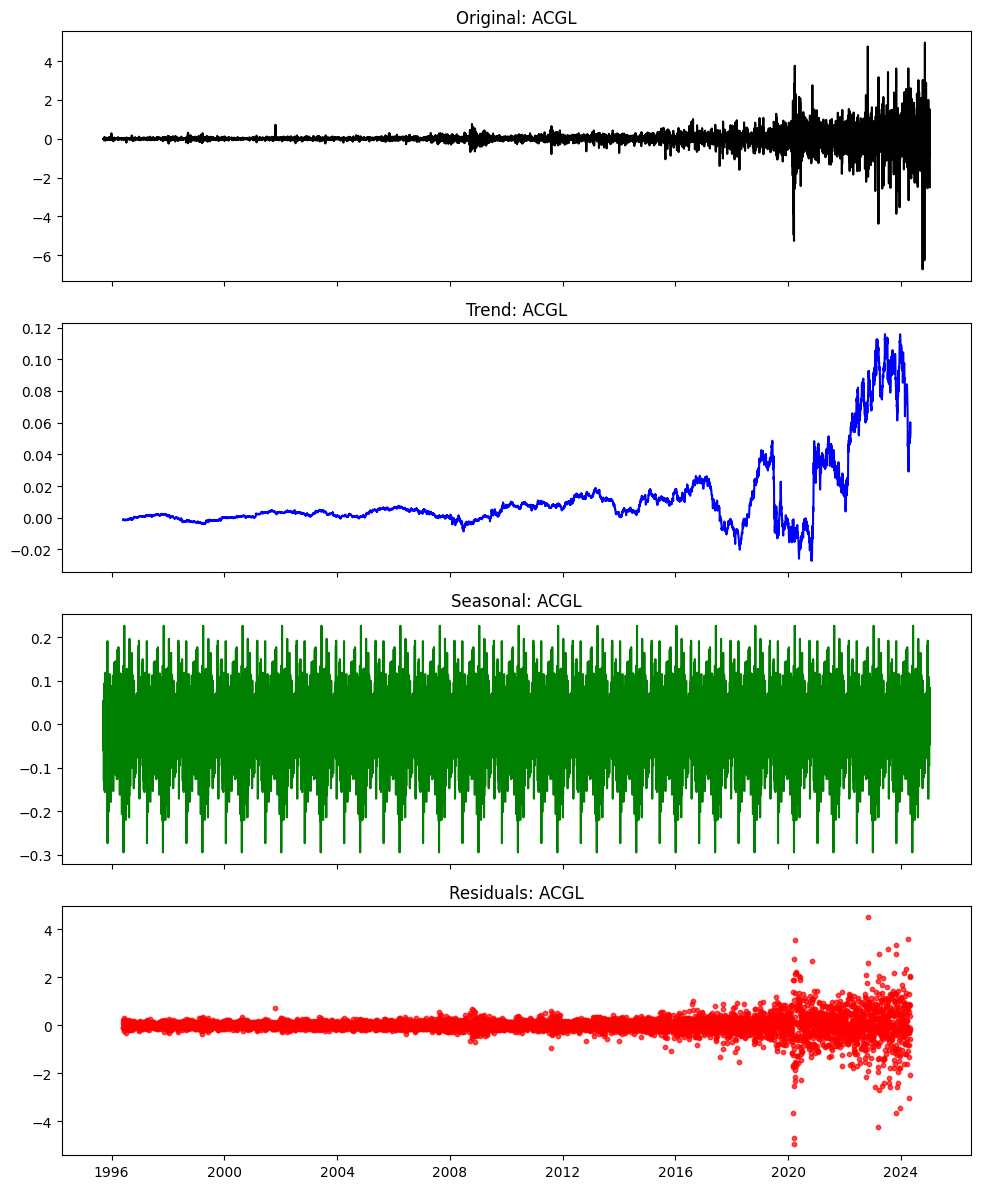

In [ ]:
def plot_seasonal_decomposition(df, period=365, model='additive', title=""):
    decomposition = seasonal_decompose(df, model=model, period=period)

    residuals = decomposition.resid
    fig, axes = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

    # Plot Original
    axes[0].plot(decomposition.observed, label='Original', color='black')
    axes[0].set_title(f'Original: {title}')

    # Plot Trend
    axes[1].plot(decomposition.trend, label='Trend', color='blue')
    axes[1].set_title(f'Trend: {title}')

    # Plot Seasonal
    axes[2].plot(decomposition.seasonal, label='Seasonal', color='green')
    axes[2].set_title(f'Seasonal: {title}')

    # Plot Residuals
    axes[3].scatter(residuals.index, residuals, s=10, alpha=0.7, c='red')
    axes[3].set_title(f'Residuals: {title}')

    plt.tight_layout()
    plt.show()

plot_seasonal_decomposition(acgl_diff, period=365, model='additive', title="ACGL")

- The data starts **relatively stable** with low variability and becomes **increasingly volatile** over time, especially in recent years.

- The trend component reveals a **long-term increase** in the differenced values, particularly noticeable after 2012.

- The seasonal component shows a **consistent repeating pattern**, indicating strong seasonality in the data. This implies regular and predictable seasonal effects on ACGL's stock behavior.

- Early in the series, the residuals are **tightly clustered**, indicating low variability. However, in recent years, the residuals show **increased dispersion**, pointing to higher random variability or potential anomalies in the stock's behavior.

Lets decompose the S&P500 series next:

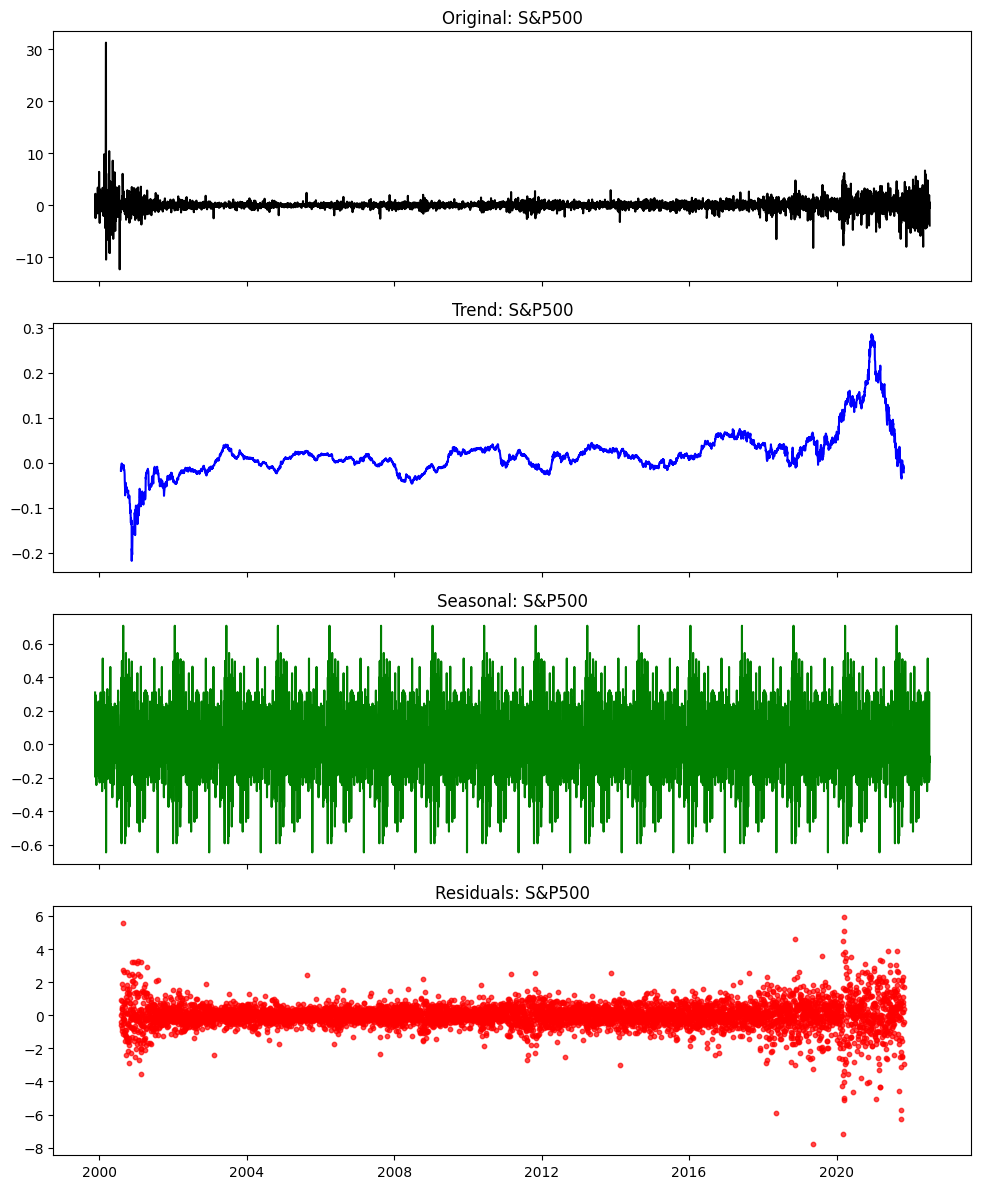

In [ ]:
plot_seasonal_decomposition(sp500_diff, period=365, model='additive', title="S&P500")

- Initially, there are **large spikes in volatility**, especially around the early 2000s, indicating high variability. Over time, the **data stabilizes**, though some recent periods show increased volatility again.

- There are periods of both growth and decline. Notably, **the trend increases steadily until around 2020**, after which it shows a **sharp decline.**

- The seasonal component displays a **consistent, repeating pattern** with stable amplitude throughout the series.

- Initially, the residuals exhibit **high dispersion** (large random variability), which diminishes after the early 2000s. However, there is a **resurgence of variability** in recent years.

# **5. Rolling Statistics**

What are they?
- Rolling statistics, such as the **rolling mean** and **rolling standard deviation,** provide a way to analyze the trends and variability in a time-series dataset over a specified "window" of time.

**Rolling Mean:**
Smooths out short-term fluctuations to reveal the longer-term trend in the data.
It calculates the average value of the time series over a sliding window of a given size.

**Rolling Standard Deviation:**
Measures the variability or volatility of the data within the rolling window.
It computes the standard deviation over the same sliding window.

**We will be using a window of 252, corresponding to the average business days in a year.**

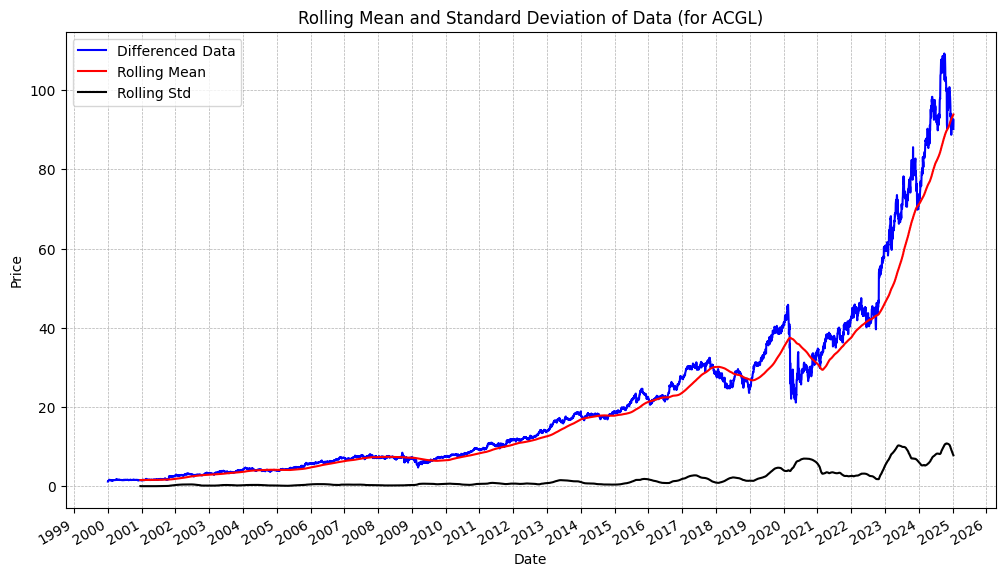

None


In [ ]:
def plot_rolling_statistics(df_close, window, start_year=2000, title="", save_path=None):
    df_filtered = df_close[df_close.index.year >= start_year].dropna()

    rolmean = df_filtered.rolling(window).mean()
    rolstd = df_filtered.rolling(window).std()

    plt.figure(figsize=(12, 7))
    plt.plot(df_filtered, color='blue', label='Differenced Data')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
    plt.gcf().autofmt_xdate()

    plt.legend(loc='best')
    plt.title(f'Rolling Mean and Standard Deviation of Data (for {title})')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.show()

print(plot_rolling_statistics(acgl_close, window=252, title="ACGL"))

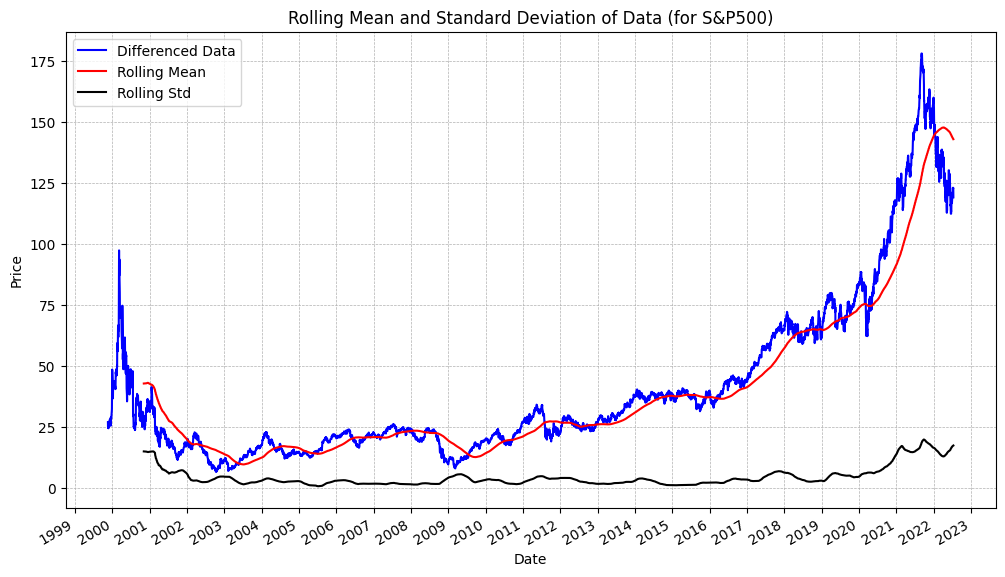

None


In [ ]:
print(plot_rolling_statistics(sp500_close, window=252, start_year=1990, title="S&P500"))

We can see from the plotted rolling mean and standard deviation, the S&P500 index is much more volatile and prone to spikes in price over a large period of time, when compared to the ACGL stock.

# **6. ARIMA Model**

We must first determine the parameters to use for our ARIMA model.

Remember:
- **p = AutoRegressive order:** Determined using the Partial Autocorrelation Function (PACF) plot. Significant spikes in the PACF suggest potential values for p.

- **d = Differencing order:** Determined by the number of times we differenced the series in order to achieve stationarity.

- **q = Moving Average order:** Determined using the Autocorrelation Function (ACF) plot. Significant spikes in the ACF suggest potential values for q.


## a. AutoCorrelation (ACF)

Autocorrelation measures how much the current value in a time series is related to its past values (lagged values).
For each lag (1 day, 2 days, etc.), the autocorrelation checks the strength of the relationship between the current value and the value that far back.

## b. Partial Autocorrelation (PACF)

Partial autocorrelation measures the direct relationship between the current value and a specific lag, while ignoring the influence of the lags in between.
PACF removes the effects of all the intermediate lags. It gives a clearer picture of how much each specific lag contributes to predicting the current value.

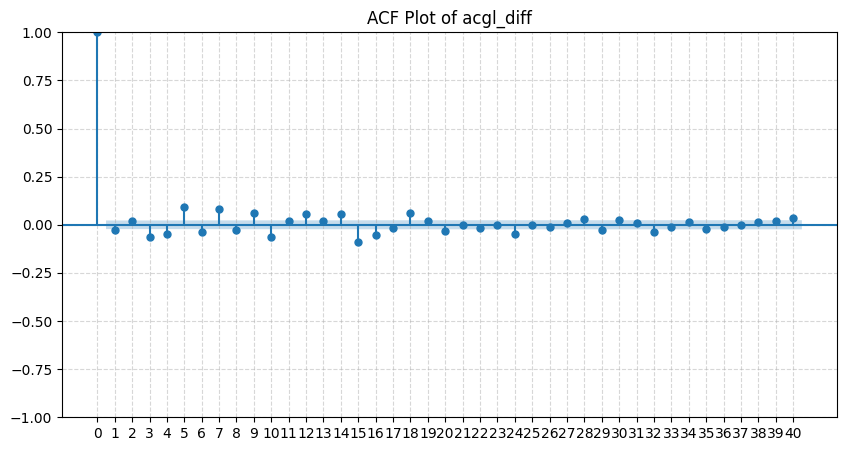

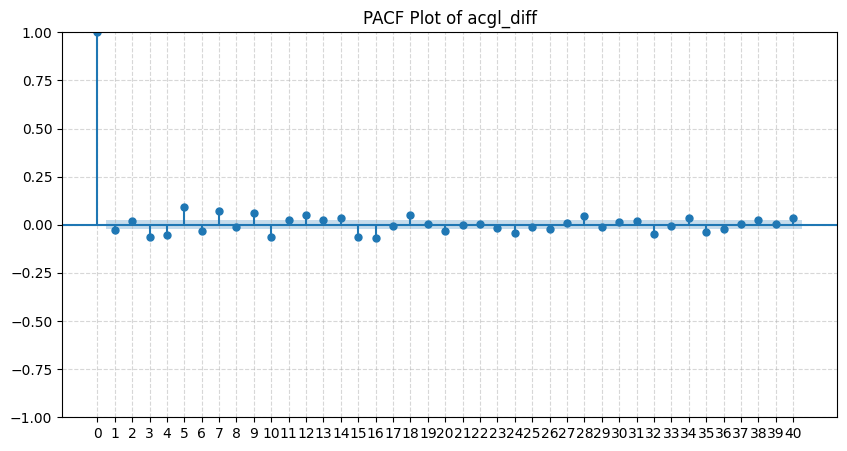

In [ ]:
def plot_acf_custom(data, lags=40, title=""):

    fig, ax = plt.subplots(figsize=(10, 5))
    plot_acf(data, lags=lags, ax=ax)
    ax.set_xticks(np.arange(0, lags + 1, 1))
    plt.grid(True, linestyle='--', alpha=0.5)
    ax.set_title(f'{title}')
    plt.show()

def plot_pacf_custom(data, lags=40, title=""):

    fig, ax = plt.subplots(figsize=(10, 5))
    plot_pacf(data, lags=lags, ax=ax)
    ax.set_xticks(np.arange(0, lags + 1, 1))
    plt.grid(True, linestyle='--', alpha=0.5)
    ax.set_title(f'{title}')
    plt.show()

plot_acf_custom(acgl_diff, lags=40, title="ACF Plot of acgl_diff")
plot_pacf_custom(acgl_diff, lags=40, title="PACF Plot of acgl_diff")

For both the ACF and PACF plots of the ACGL data, there seem to be significant spikes at lag (business day) 5, 7, 10, 15. This could indicate a weekly business cycle (5-day cycle).

The lag at 10 may reference an extended weekly influence of two business weeks, while the lag at 7 could indicate a weekly seasonality, even if we're only analyzing business days.



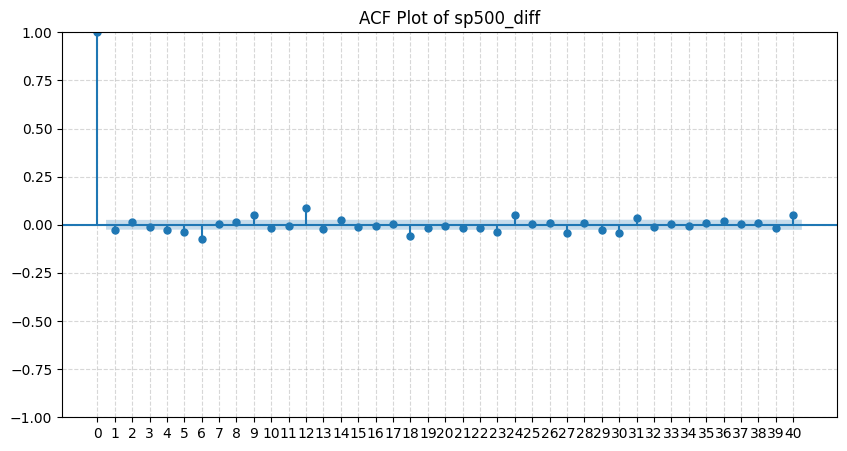

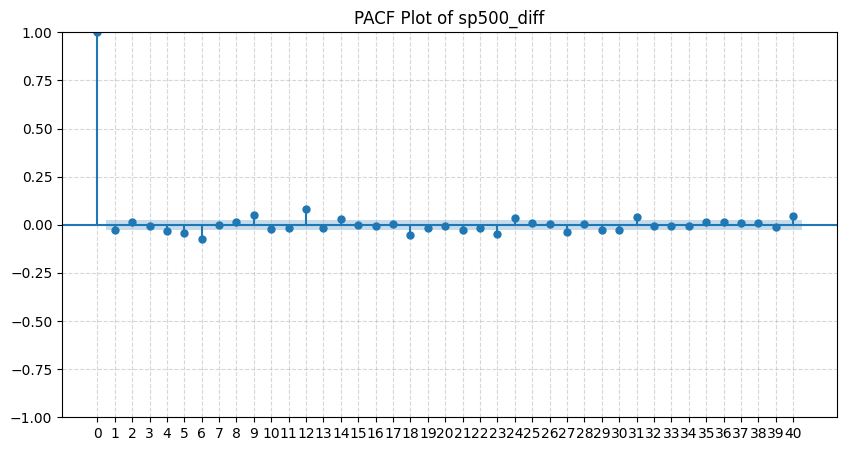

In [ ]:
plot_acf_custom(sp500_diff, lags=40, title="ACF Plot of sp500_diff")
plot_pacf_custom(sp500_diff, lags=40, title="PACF Plot of sp500_diff")

For S&P500's ACF and PACF pots, significant spikes appear at days 6, 12, 18 and 24. The spikes gradually drop off after the 24th lag. This may indicate a 6-day seasonality cycle.

**Note:** We always ignore the first (which is also the largest) spike in an ACF or a PACF plot. At lag 0, the time series is being compared to itself, which always results in a perfect correlation of 1.

Since there are no clear significant spikes for the ACF and PACF plots of both stocks, we will use other methods for finding the most optimal parameters for our ARIMA model. We will use:

1. **auto_arima()**
2. **grid search**

## 1. auto_arima()

The **auto_arima()** function automates the process of selecting the best ARIMA model by evaluating many combinations of model parameters (p,d,q).

It chooses the best parameters based on criterion like AIC or BIC.

- **Akaike Information Criterion (AIC):** This metric balances the model's goodness of fit with its complexity.
The model with the lowest AIC is typically preferred.

- **Bayesian Information Criterion (BIC):** This metric applies a larger penalty for complexity than AIC, making it more rigid against overfitting. BIC tends to favor simpler models with fewer parameters compared to AIC.
Lower BIC values indicate a better model.


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-6811.990, Time=0.46 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-6810.805, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-6810.858, Time=0.79 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-6812.026, Time=1.52 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=2.50 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-6806.881, Time=1.81 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-6814.736, Time=0.83 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-6819.240, Time=1.05 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-6822.078, Time=6.62 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-6833.319, Time=5.10 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-6832.317, Time=2.66 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-6828.715, Time=8.65 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-6833.401, Time=4.89 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-6823.410, Time=4.85 sec
 ARIMA(3,0,2)(0,0,0)[0] i

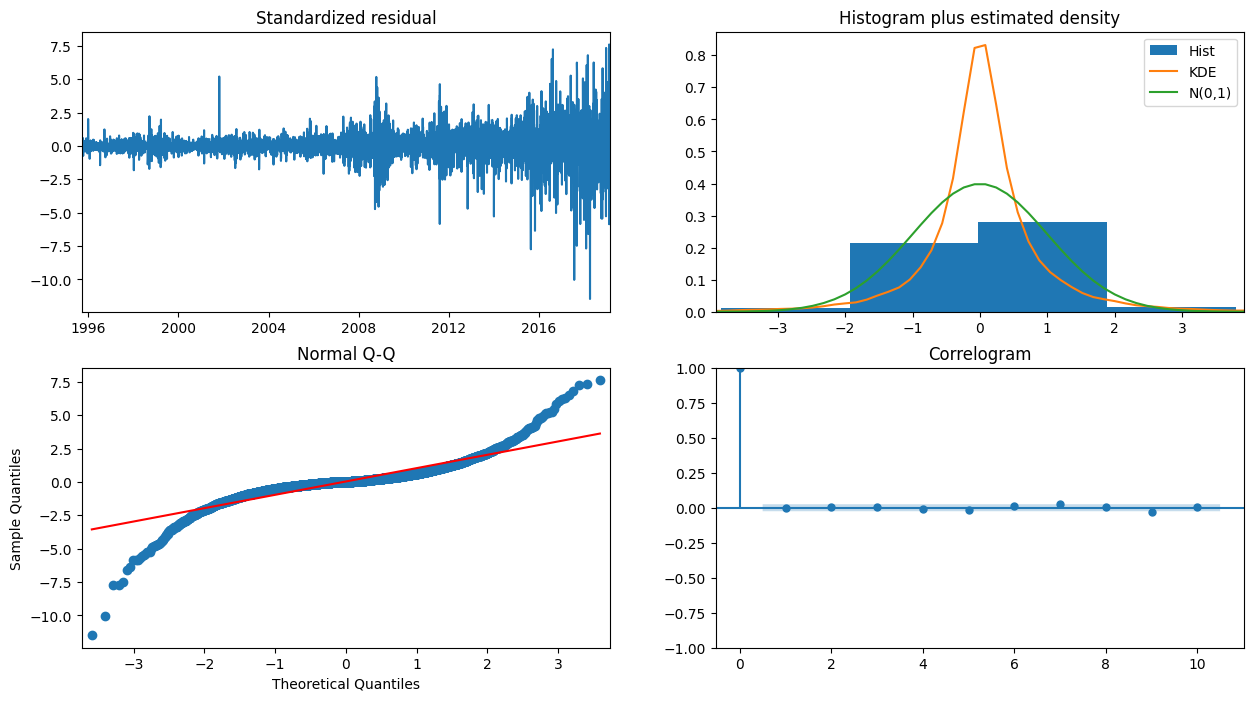

 ARIMA(3,0,2)(0,0,0)[0]          


In [ ]:
def fit_auto_arima(train_data, max_p=3, max_q=3, m=1, seasonal=False, trace=True, figsize=(15, 8)):

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=FutureWarning)
        warnings.filterwarnings("ignore", category=UserWarning)

        # Fit the auto ARIMA model
        model_autoARIMA = auto_arima(train_data,
                                     start_p=0, start_q=0,
                                     test='adf',
                                     max_p=max_p, max_q=max_q,
                                     m=m,
                                     d=None,
                                     seasonal=seasonal,
                                     start_P=0,
                                     D=0,
                                     trace=trace,
                                     error_action='ignore',
                                     suppress_warnings=True,
                                     stepwise=True)

    # Summary
    print(model_autoARIMA.summary())

    model_autoARIMA.plot_diagnostics(figsize=figsize)
    plt.show()

    return model_autoARIMA

print(fit_auto_arima(acgl_diff_train_data, max_p=3, max_q=3, m=1, seasonal=False, trace=True, figsize=(15, 8)))

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12914.263, Time=0.31 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=12914.965, Time=0.51 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=12914.974, Time=2.21 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=12917.085, Time=3.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=12915.929, Time=1.49 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 7.896 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4726
Model:                        SARIMAX   Log Likelihood               -6456.132
Date:                Thu, 16 Jan 2025   AIC                          12914.263
Time:                        15:18:14   BIC                          12920.724
Sample:                    11-19-1999   HQIC                         12916.534
                         - 12-29-2017                                  

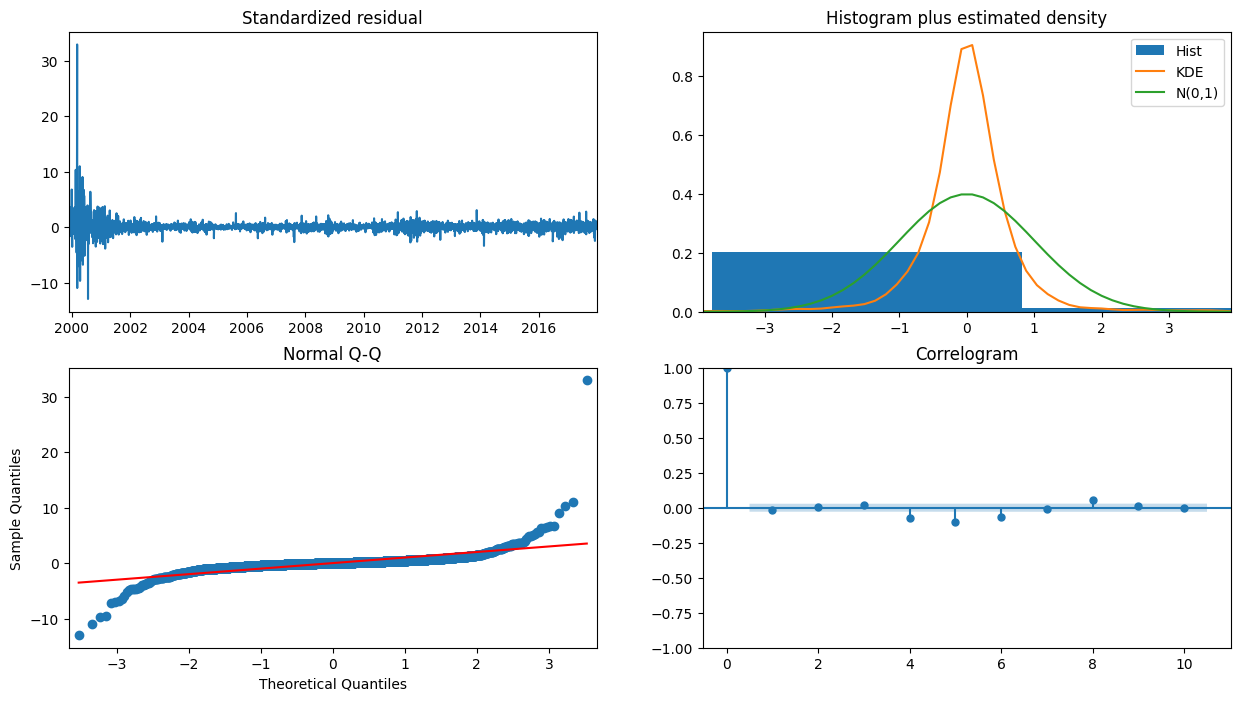

 ARIMA(0,0,0)(0,0,0)[0]          


In [ ]:
print(fit_auto_arima(sp500_diff_train_data, max_p=3, max_q=3, m=1, seasonal=False, trace=True, figsize=(15, 8)))

Results:

1. **ACGL Stock:** auto_arima() chose **(3,0,2)** as the best model.

  - Interpretation: The model has identified **some temporal structure** within the dataset, so there is likely a relationship between past values and future predictions.

2. **S&P500 Index:** auto_arima() chose **(0,0,0)** as the best model.

  - Interpretation: The model suggests **no significant structure or autocorrelation** in the data. This could mean that the series doesn't have any observable trends or cycles and might just be random noise in the data.

## 2. Grid Search

**Grid Search** exhaustively tests a range of values for p, d, and q. For each combination, an ARIMA model is fitted to the data, and its AIC and BIC is calculated to evaluate the model's fit.

The best model is the one that minimizes AIC or BIC, suggesting a good balance between model fit and complexity. Although this provides a **comprehensive search** of the best fit, it is a **computationally expensive** method.

Best ARIMA model: ARIMA(0, 1, 1)
Best AIC: -6807.688263036065
                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 6120
Model:                 ARIMA(0, 1, 1)   Log Likelihood                3405.844
Date:                Thu, 16 Jan 2025   AIC                          -6807.688
Time:                        15:19:45   BIC                          -6794.250
Sample:                    09-15-1995   HQIC                         -6803.026
                         - 02-28-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9994      0.000  -2248.314      0.000      -1.000      -0.998
sigma2         0.0192      0.000    155.859      0.000       0.019   

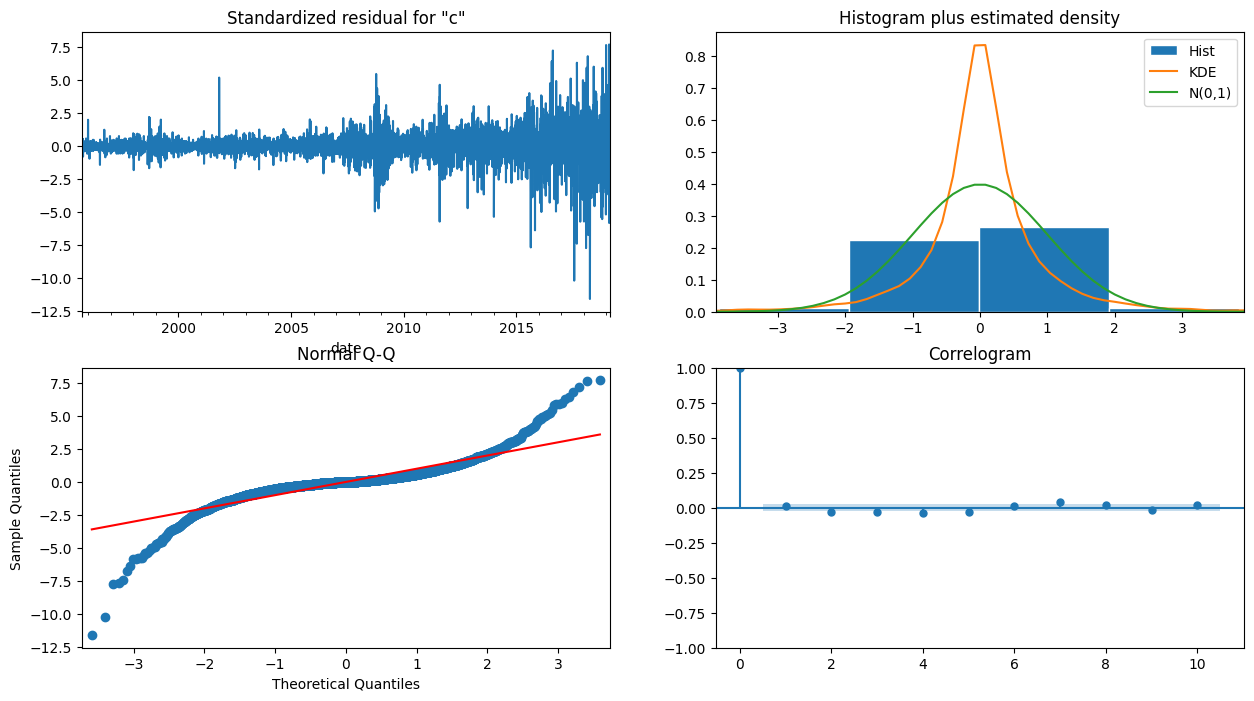

{'best_order': (0, 1, 1), 'best_aic': -6807.688263036065, 'best_model': <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x7c347806a8d0>}


In [ ]:
def grid_search_arima(data, p_range, q_range, d=1, n_jobs=-1, figsize=(15, 8)):

    def fit_arima_model(p, q):

        try:
            model = ARIMA(data, order=(p, d, q))
            model_fit = model.fit()
            aic = model_fit.aic
            return (p, q, aic, model_fit)
        except Exception:
            return (p, q, np.inf, None)

    # Perform grid search
    results = Parallel(n_jobs=n_jobs)(delayed(fit_arima_model)(p, q) for p in p_range for q in q_range)

    best_aic = np.inf
    best_order = None
    best_model = None

    for p, q, aic, model_fit in results:
        if aic < best_aic:
            best_aic = aic
            best_order = (p, d, q)
            best_model = model_fit

    # Results
    print(f"Best ARIMA model: ARIMA{best_order}")
    print(f"Best AIC: {best_aic}")

    if best_model:
        print(best_model.summary())
        best_model.plot_diagnostics(figsize=figsize)
        plt.show()

    return {
        "best_order": best_order,
        "best_aic": best_aic,
        "best_model": best_model,
    }

print(grid_search_arima(acgl_diff_train_data, p_range=range(0, 2), q_range=range(0, 2), d=1))

Best ARIMA model: ARIMA(0, 1, 1)
Best AIC: 12922.725816929655
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4726
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -6459.363
Date:                Thu, 16 Jan 2025   AIC                          12922.726
Time:                        15:19:59   BIC                          12935.647
Sample:                    11-19-1999   HQIC                         12927.268
                         - 12-29-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9998      0.004   -238.078      0.000      -1.008      -0.992
sigma2         0.9000      0.004    221.747      0.000       0.892   

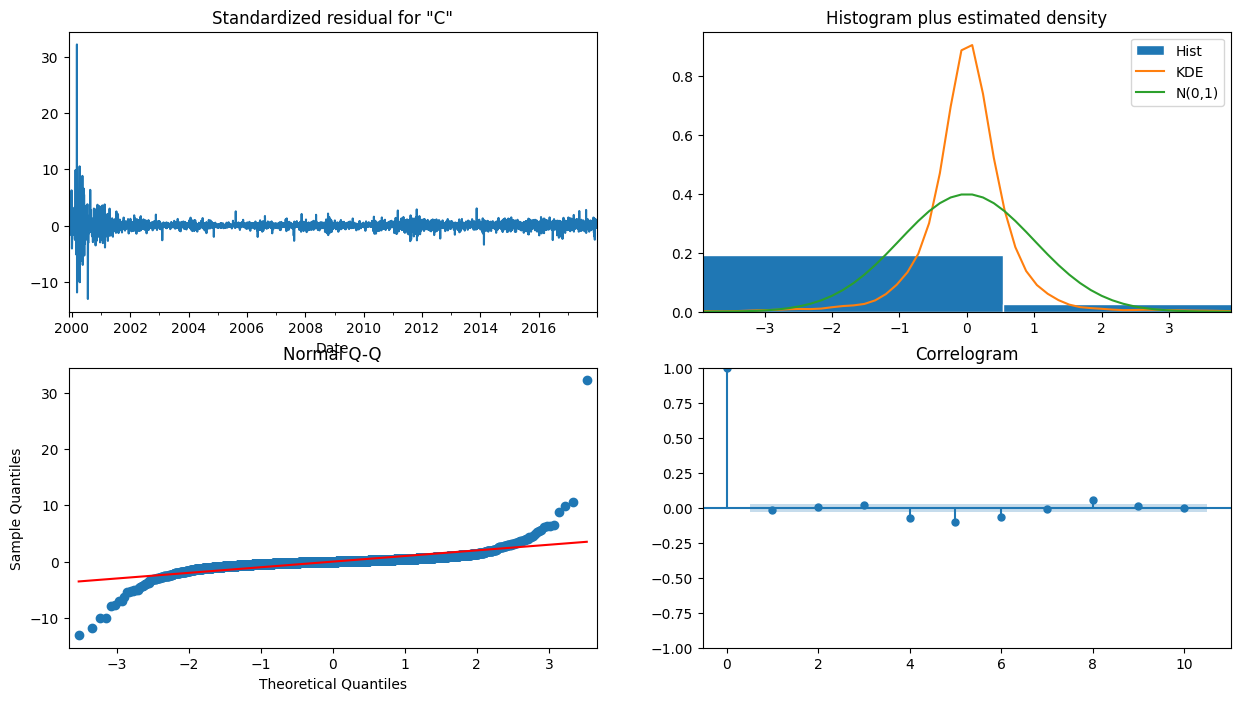

{'best_order': (0, 1, 1), 'best_aic': 12922.725816929655, 'best_model': <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x7c3478162810>}


In [ ]:
print(grid_search_arima(sp500_diff_train_data, p_range=range(0, 2), q_range=range(0, 2), d=1))

The grid search algorithm chose the ARIMA model with the parameters of **(0,1,1)** as the best model for both datasets.

- For ACGL, the grid search suggestion offers a slightly better AIC and BIC, so we will choose (0,1,1).

- For S&P500, the auto_arima() function offers a slightly better AIC and BIC, so we will choose (0,0,0).

## Building the ARIMA Model

For our ARIMA model building, we will use 80% of the available data for training and 20% for testing.

**Note:** We will not be using the original datasets (acgl_close, sp500_close) for the ARIMA model training, but rather the differenced series: acgl_diff and sp500_diff.

Below is only a plot of the data's 80/20 split visualized on the original closing prices.

In [ ]:
acgl_train_data, acgl_test_data = acgl_close[:int(len(acgl_close)*0.8)], acgl_close[int(len(acgl_close)*0.8):]
sp500_train_data, sp500_test_data = sp500_close[:int(len(sp500_close)*0.8)], sp500_close[int(len(sp500_close)*0.8):]


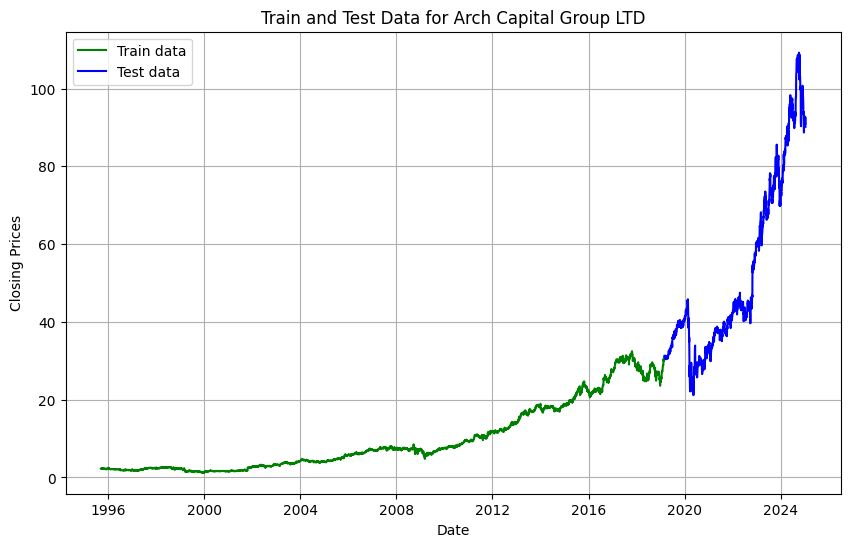

None


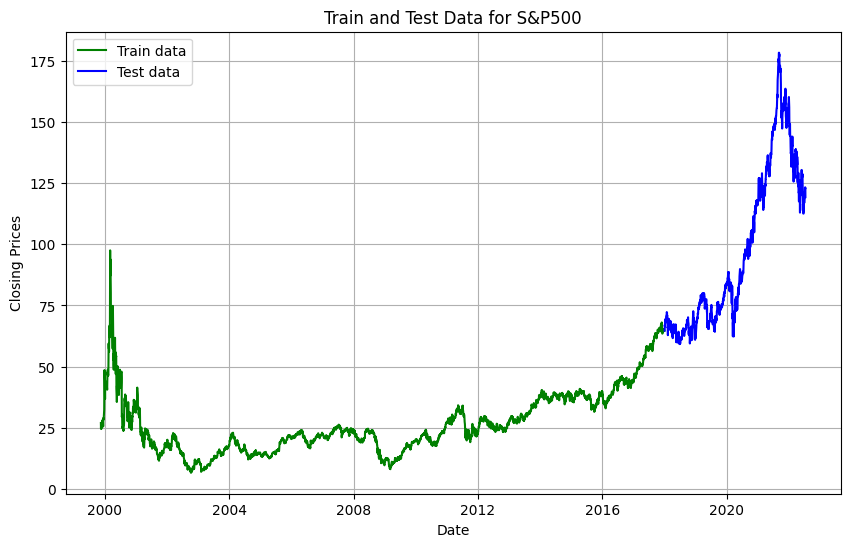

None


In [ ]:
def plot_train_test_data(train_data, test_data, title="", xlabel="Date", ylabel="Closing Prices"):

    plt.figure(figsize=(10, 6))
    plt.grid(True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(train_data, color='green', label='Train data')
    plt.plot(test_data, color='blue', label='Test data')
    plt.title(title)
    plt.legend()
    plt.show()

print(plot_train_test_data(acgl_train_data, acgl_test_data, title="Train and Test Data for Arch Capital Group LTD" ))
print(plot_train_test_data(sp500_train_data, sp500_test_data, title="Train and Test Data for S&P500"))

What we are actually going to be using for our ARIMA model is shown below: the 80/20 split on the differenced series:

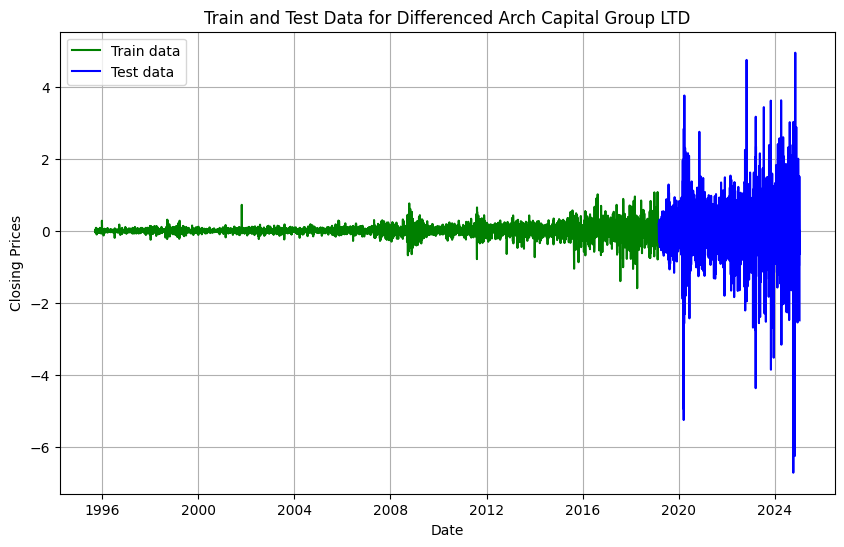

None


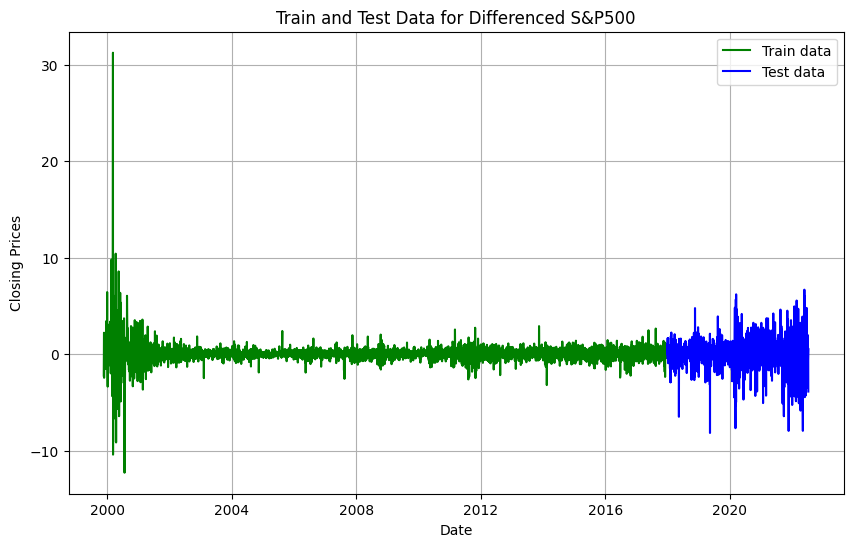

None


In [ ]:
acgl_diff_train_data, acgl_diff_test_data = acgl_diff[:int(len(acgl_diff)*0.8)], acgl_diff[int(len(acgl_diff)*0.8):]
sp500_diff_train_data, sp500_diff_test_data = sp500_diff[:int(len(sp500_diff)*0.8)], sp500_diff[int(len(sp500_diff)*0.8):]

print(plot_train_test_data(acgl_diff_train_data, acgl_diff_test_data, title="Train and Test Data for Differenced Arch Capital Group LTD" ))
print(plot_train_test_data(sp500_diff_train_data, sp500_diff_test_data, title="Train and Test Data for Differenced S&P500"))

Lets fit the ARIMA model:

- ACGL parameters **(p,d,q) = (0,1,1)**
- S&P500 parameters **(p,d,q) = (0,0,0)**

In [ ]:
acgl_model = sm.tsa.ARIMA(acgl_diff_train_data, order=(0,1,1))
acgl_fitted_model = acgl_model.fit()

print(acgl_fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 6120
Model:                 ARIMA(0, 1, 1)   Log Likelihood                3405.844
Date:                Thu, 16 Jan 2025   AIC                          -6807.688
Time:                        14:11:27   BIC                          -6794.250
Sample:                    09-15-1995   HQIC                         -6803.026
                         - 02-28-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9994      0.000  -2248.314      0.000      -1.000      -0.998
sigma2         0.0192      0.000    155.859      0.000       0.019       0.019
Ljung-Box (L1) (Q):                   0.57   Jarque-

In [ ]:
sp500_model = sm.tsa.ARIMA(sp500_diff_train_data, order=(0,0,0))
sp500_fitted_model = sp500_model.fit()

print(sp500_fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4726
Model:                          ARIMA   Log Likelihood               -6455.964
Date:                Thu, 16 Jan 2025   AIC                          12915.929
Time:                        14:11:39   BIC                          12928.850
Sample:                    11-19-1999   HQIC                         12920.470
                         - 12-29-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0080      0.015      0.522      0.601      -0.022       0.038
sigma2         0.8996      0.002    516.346      0.000       0.896       0.903
Ljung-Box (L1) (Q):                   1.31   Jarque-

# **7. Forecasting**

The **forecast_and_evaluate** function is designed to generate forecasts using each dataset's fitted ARIMA model and evaluate its performance against the actual test data.

The model's **forecast method** is used to predict the future values of the series.

The forecasted differences are then **added cumulatively to the last observed value** in the training data. This step is necessary to map the forecast back to the original scale, which reflects the actual values rather than the differences of the values.



We will use two quantitative metrics to evaluate the models performance:

1. **Mean-Squared-Error (MSE):** the average of the squared differences between the predicted values and the actual values.

2. **Mean-Absolute-Error (MAE):** the average of the absolute differences between the predicted values and the actual values.

Lower MSE ad MAE values indicate better peformance, as both represent smaller differences between the predicted and actual values.

Mean Squared Error: 0.8733574190286939
Mean Absolute Error: 0.6270934753527022


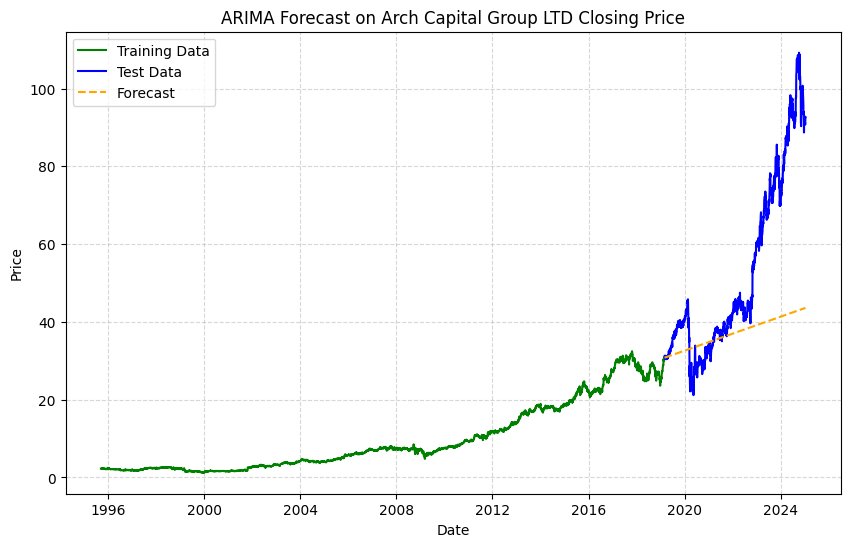

None


In [ ]:
def forecast_and_evaluate(fitted_model, train_data, test_data, original_series, title=""):

    # Forecast the test data
    forecast_steps = len(test_data)
    forecast_diff = fitted_model.forecast(steps=forecast_steps)

    # Restore the original scale by cumulative summation
    last_train_value = original_series.iloc[len(train_data) - 1] # last value in series
    forecast = last_train_value + np.cumsum(forecast_diff)
    forecast_index = original_series.index[len(train_data):len(train_data) + forecast_steps]

    # MSE and MAE
    mse = mean_squared_error(test_data, forecast_diff)
    mae = mean_absolute_error(test_data, forecast_diff)

    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")

    # Plot of actual vs forecasted values
    plt.figure(figsize=(10, 6))

    # Plot training data
    plt.plot(original_series.index[:len(train_data)], original_series[:len(train_data)], label='Training Data', color='green')

    # Plot test data
    plt.plot(original_series.index[len(train_data):len(train_data) + len(test_data)],
             original_series[len(train_data):len(train_data) + len(test_data)],
             label='Test Data', color='blue')

    # Plot the forecast (orange dotted line)
    plt.plot(forecast_index, forecast, label='Forecast', linestyle='--', color='orange')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(title)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

print(forecast_and_evaluate(acgl_fitted_model, acgl_diff_train_data, acgl_diff_test_data, acgl_close, title="ARIMA Forecast on Arch Capital Group LTD Closing Price"))


Mean Squared Error: 2.8958036311975546
Mean Absolute Error: 1.1851451277361802


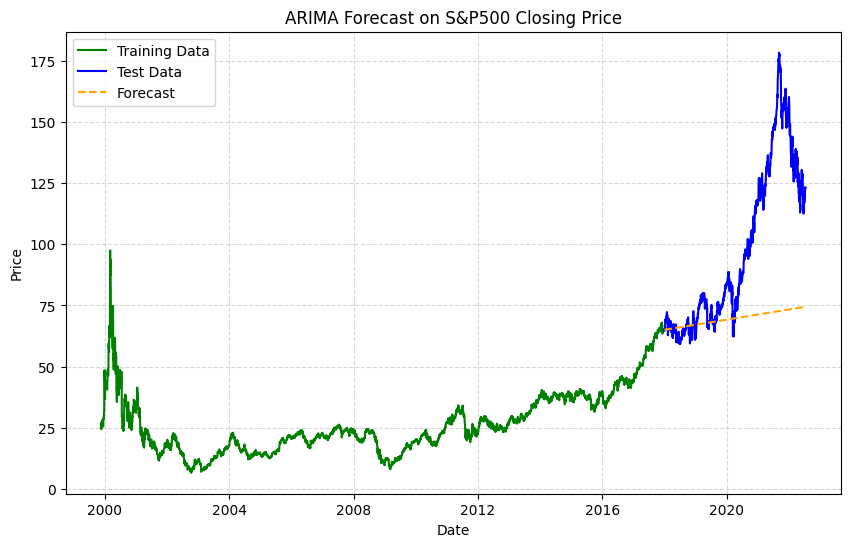

None


In [ ]:
print(forecast_and_evaluate(sp500_fitted_model, sp500_diff_train_data, sp500_diff_test_data, sp500_close, title="ARIMA Forecast on S&P500 Closing Price"))

# **8. Conclusions**

For the **ACGL** data, the model's performance is **relatively strong**, with an MSE of **0.873** and an MAE of **0.627**. These values suggest that the forecasted closing prices are close to the actual values.

In contrast, the **S&P500** data shows **higher errors**, with an MSE of **2.896** and an MAE of **1.185**. This suggests that the model's predictions for the S&P500 are less accurate.
The higher values for the S&P500 indicate that the model may not be fully capturing the volatility and complexity of the broader market data.

- In conclusion, ARIMA proves to be an **effective model for simpler stocks** like Arch Capital Group Ltd (ACGL), where it demonstrates better performance in both the model fitting and forecasting stages.

- The ARIMA model achieved **lower values for key metrics** such as **AIC, BIC, MSE,** and **MAE,** indicating a good fit and accurate forecasts for this stock.

- This is likely due to the relatively stable and predictable nature of individual stocks like ACGL, which ARIMA is well-suited to model.

- However, for more **complex indices like the S&P500**, which incorporate broader market dynamics and higher volatility, **ARIMA falls short in terms of predictive accuracy**, as evidenced by the **higher values for AIC, BIC, MSE,** and **MAE.**

- In such cases, more advanced forecasting methods, such as machine learning techniques, GARCH models, or other predictive models, would be more appropriate.